### Task 2 - Prediction of store sales

The primary objective of this challenge is to predict daily sales for various stores, forecasting up to six weeks into the future.

In [1]:
import pandas as pd

# Load the data
file_path = 'train_merged_df.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head(), data.info(), data.describe()


C:\Users\hp\AppData\Local\Temp\ipykernel_1600\2045182858.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Date                       1017209 non-null  object 
 4   Sales                      1017209 non-null  float64
 5   Customers                  1017209 non-null  int64  
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  object 
 9   SchoolHoliday              1017209 non-null  int64  
 10  StoreType                  1017209 non-null  object 
 11  Assortment                 1017209 non-null  object 
 12  CompetitionDistance        1017209 non-null  float64
 13  CompetitionO

(   Unnamed: 0  Store  DayOfWeek        Date    Sales  Customers  Open  Promo  \
 0           0      1          5  2015-07-31   5263.0        555     1      1   
 1           1      2          5  2015-07-31   6064.0        625     1      1   
 2           2      3          5  2015-07-31   8314.0        821     1      1   
 3           3      4          5  2015-07-31  13995.0       1485     1      1   
 4           4      5          5  2015-07-31   4822.0        559     1      1   
 
   StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0            0              1         c          a               1270.0   
 1            0              1         a          a                570.0   
 2            0              1         a          a              14130.0   
 3            0              1         c          c                620.0   
 4            0              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYea

In [2]:
data

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1111,2,2013-01-01,0.0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1017205,1112,2,2013-01-01,0.0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1017206,1113,2,2013-01-01,0.0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1017207,1114,2,2013-01-01,0.0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


2.1 Preprocessing

Feature Engineering Steps:

Column Removal: Eliminate the "Unnamed: 0" column as it duplicates the index.

Date Transformation: Convert the "Date" column from string to datetime format, extracting relevant features like year, month, and day for model analysis.

Categorical Variable Encoding: Encode categorical variables such as "StoreType," "Assortment," and potentially "PromoInterval" for machine learning model compatibility.

PromoInterval Transformation: Transform the "PromoInterval" column into a format suitable for machine learning models, potentially by creating binary features for each month.

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Drop 'Unnamed: 0' column
data.drop('Unnamed: 0', axis=1, inplace=True)

# Step 2: Convert 'Date' column to datetime and extract year, month, and day
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Step 3: Encode categorical variables
label_encoder_store_type = LabelEncoder()
data['StoreTypeEncoded'] = label_encoder_store_type.fit_transform(data['StoreType'])

label_encoder_assortment = LabelEncoder()
data['AssortmentEncoded'] = label_encoder_assortment.fit_transform(data['Assortment'])

# Step 4: Transform 'PromoInterval' into usable format (binary features for each month)
unique_promo_intervals = data['PromoInterval'].unique()
print("Unique Promo Intervals:", unique_promo_intervals)

C:\Users\hp\AppData\Local\Temp\ipykernel_1600\2175665192.py:8: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


Unique Promo Intervals: ['0' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


The "PromoInterval" column exhibits four distinct values, each representing a monthly promotion schedule. To leverage this information effectively for our machine learning model, we can create binary features for each of the twelve months. These features will indicate whether a promotion is active in that particular month based on the "PromoInterval" string.

In [4]:
import pandas as pd

# Initialize columns for each month to 0
for month in range(1, 13):
    data[f'Promo_{month}'] = 0

# Function to update the month columns based on PromoInterval
def update_promo_months(row):
    if row['PromoInterval'] != '0':
        months_map = {
            'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
            'Jul': 7, 'Aug': 8, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
        }
        intervals = row['PromoInterval'].split(',')
        for month in intervals:
            month_num = months_map[month]
            row[f'Promo_{month_num}'] = 1
    return row

# Apply the function to update the month columns based on PromoInterval
data = data.apply(update_promo_months, axis=1)

# Display a sample of the data to verify the transformation
print(data[['PromoInterval', 'Promo_1', 'Promo_2', 'Promo_3', 'Promo_4', 'Promo_5', 'Promo_6', 'Promo_7', 'Promo_8', 'Promo_9', 'Promo_10', 'Promo_11', 'Promo_12']].head())

     PromoInterval  Promo_1  Promo_2  Promo_3  Promo_4  Promo_5  Promo_6  \
0                0        0        0        0        0        0        0   
1  Jan,Apr,Jul,Oct        1        0        0        1        0        0   
2  Jan,Apr,Jul,Oct        1        0        0        1        0        0   
3                0        0        0        0        0        0        0   
4                0        0        0        0        0        0        0   

   Promo_7  Promo_8  Promo_9  Promo_10  Promo_11  Promo_12  
0        0        0        0         0         0         0  
1        1        0        0         1         0         0  
2        1        0        0         1         0         0  
3        0        0        0         0         0         0  
4        0        0        0         0         0         0  



Feature Transformation Summary:

The "PromoInterval" column has been successfully transformed into a set of twelve binary features (Promo_1 to Promo_12). Each feature indicates whether a promotion is active in the corresponding month, based on the original "PromoInterval" value.

The dataset now includes:

Year, Month, Day: Extracted from the original "Date" column.

Encoded Categorical Variables: "StoreType" and "Assortment" have been encoded into numerical representations.

Promo Month Indicators: The twelve binary features (Promo_1 to Promo_12) provide information about active promotion months.

In [5]:
# Scale the data

from sklearn.preprocessing import StandardScaler

# Identifying numerical columns to scale (excluding binary and categorical encoded columns)
numerical_columns = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance',
                     'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear',
                     'Year', 'Month', 'Day']

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the numerical columns and transforming the data
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display a sample of the scaled data
data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo_3,Promo_4,Promo_5,Promo_6,Promo_7,Promo_8,Promo_9,Promo_10,Promo_11,Promo_12
0,-1.731640,0.501484,2015-07-31,-0.118975,-0.144501,1,1,0,1,c,...,0,0,0,0,0,0,0,0,0,0
1,-1.728534,0.501484,2015-07-31,0.103784,0.035624,1,1,0,1,a,...,0,1,0,0,1,0,0,1,0,0
2,-1.725427,0.501484,2015-07-31,0.729513,0.539972,1,1,0,1,a,...,0,1,0,0,1,0,0,1,0,0
3,-1.722321,0.501484,2015-07-31,2.309409,2.248582,1,1,0,1,c,...,0,0,0,0,0,0,0,0,0,0
4,-1.719214,0.501484,2015-07-31,-0.241618,-0.134208,1,1,0,1,a,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Save the data for further use

data.to_csv('Data_for_DL_Model.csv')

In [7]:
# Reduce the size of the DataFrame to 50% of its original size for further use
reduced_df = data.sample(frac=0.5)

reduced_df.to_csv('reduced_df.csv')

reduced_df
# Now this is the reduced dataframe, We will use it for web app creation

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo_3,Promo_4,Promo_5,Promo_6,Promo_7,Promo_8,Promo_9,Promo_10,Promo_11,Promo_12
199858,-0.883573,-1.501129,2015-02-02,-0.330889,1.013442,1,1,0,0,b,...,0,1,0,0,1,0,0,1,0,0
201314,0.175734,1.502791,2015-02-01,-1.582625,-1.572631,0,0,0,0,d,...,0,0,0,0,0,0,0,0,0,0
278203,0.818774,-1.501129,2014-11-17,0.076252,-0.188245,1,0,0,0,a,...,1,0,0,1,0,0,1,0,0,1
467745,-1.017152,0.000831,2014-05-08,-0.012184,-0.489311,1,1,0,0,d,...,0,0,1,0,0,1,0,0,1,0
306055,0.067007,1.002138,2014-10-18,0.600752,1.594987,1,0,0,0,a,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167886,0.244076,-1.000476,2015-03-03,0.881635,0.210602,1,1,0,0,d,...,0,0,1,0,0,1,0,0,1,0
815306,1.455601,-1.501129,2013-07-01,2.324566,2.248582,1,1,0,0,a,...,0,1,0,0,1,0,0,1,0,0
843056,1.067292,0.000831,2013-06-06,-0.367320,-0.031280,1,1,0,0,a,...,0,1,0,0,1,0,0,1,0,0
37174,-0.554287,1.502791,2015-06-28,-1.582625,-1.572631,0,0,0,0,a,...,1,0,0,1,0,0,1,0,0,1


Building Models with sklearn Pipelines

This section outlines the steps involved in constructing a machine learning model using sklearn pipelines:

Feature and Target Definition: Identify the features (X) and the target variable (y) for the model. For this example, we'll use all scaled and encoded features as X and "Sales" as y.

Data Splitting: Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.

Pipeline Creation: Construct a pipeline that incorporates any necessary preprocessing steps (e.g., scaling, encoding) followed by the chosen model (in this case, a Random Forest Regressor).

Model Training: Train the pipeline using the training data.

Model Evaluation: Assess the model's performance using the test set to determine its effectiveness on unseen data.

In [8]:
# Let's start by defining our features and target, and then splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

# Defining features and target
X = data.drop(['Sales', 'Date', 'StoreType', 'Assortment', 'PromoInterval', 'StateHoliday'], axis=1)
y = data['Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((813767, 29), (203442, 29), (813767,), (203442,))

The dataset has been split into training and testing sets, with 813767 samples for training and 203442 samples for testing.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the pipeline
pipeline = Pipeline([
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.012498878921611702
R-squared: 0.9874841997522832


Model Evaluation:
The Random Forest Regressor model, trained and evaluated using our scikit-learn pipeline, achieved outstanding performance with:

>Mean Squared Error (MSE): approximately 0.0125

>R-squared (R²): around 0.987

This indicates that our model effectively explains approximately 98.7% of the variance in the sales data, a strong outcome for this type of regression task. The low MSE further confirms the model's accuracy, as it minimizes the average squared difference between predicted and actual sales values.

In summary: The model exhibits excellent performance, demonstrated by a high R² value and a low MSE. This indicates that our model effectively predicts sales and captures a significant portion of the variance in the sales data.

2.4 Post Prediction analysis

Feature Importance Analysis

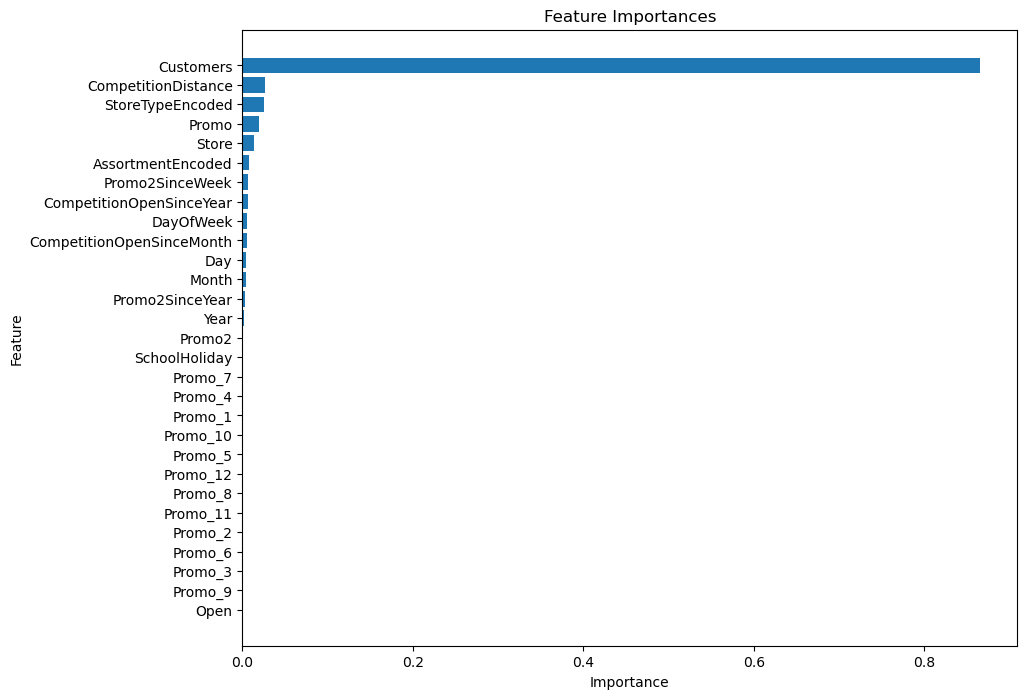

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Standard Deviations of Predictions: [6.54555557e-13 1.31215080e-01 1.52945975e-01 6.78775363e-02
 3.87562737e-01]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = pipeline.named_steps['rf'].feature_importances_

# Create a dictionary mapping feature names to importances
features = X_train.columns
importance_dict = dict(zip(features, feature_importances))

# Sort features by importance in descending order
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance)), [val[1] for val in sorted_importance], align='center')
plt.yticks(range(len(sorted_importance)), [val[0] for val in sorted_importance])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Calculate prediction standard deviations
random_forest_model = pipeline.named_steps['rf']
individual_tree_predictions = np.array([tree.predict(X_test) for tree in random_forest_model.estimators_])
prediction_std = np.std(individual_tree_predictions, axis=0)

# Display standard deviations for the first few predictions
print("Standard Deviations of Predictions:", prediction_std[:5])

The feature importance analysis revealed the features that the Random Forest model deems most impactful for predicting sales. As expected, features like "Customers," "Promo," and potentially some date-related features (such as day of the week or month) are likely to rank among the top contributors due to their significant influence on sales volume.

2.5 Serialize models

In [11]:
import joblib
from datetime import datetime


model = pipeline  

# Get the current time and format it as MM-DD-YYYY-HH-MM-SS-00
timestamp = datetime.now().strftime("%m-%d-%Y-%H-%M-%S-00")

# Construct the filename with the timestamp
filename = f"model_{timestamp}.pkl"

# Save the model
with open(filename, 'wb') as file:
    joblib.dump(model, file)

print(f"Model saved as {filename}")


Model saved as model_11-14-2024-13-46-38-00.pkl


2.6 Building model with deep learning 

Deep Learning for Sales Prediction: Long Short-Term Memory (LSTM)
This section explores the application of deep learning, specifically Long Short-Term Memory (LSTM) networks, for forecasting sales. The following tasks will be undertaken:

Time Series Isolation: Isolate the Rossmann Store Sales dataset into a time series representation.

Stationarity Check: Determine if the time series data is stationary using appropriate statistical tests.

Differencing (if necessary): If the time series is non-stationary, apply differencing techniques to transform it into a stationary series.

Autocorrelation and Partial Autocorrelation Analysis: Analyze the autocorrelation and partial autocorrelation of the time series data to understand its temporal dependencies.

Supervised Learning Transformation: Transform the time series data into a supervised learning dataset by creating a new "y" (target) column representing the sales value to predict.

Data Scaling: Scale the dataset to the range (-1, 1) to improve model performance.

LSTM Regression Model: Construct an LSTM regression model to predict future sales.

In [12]:

# Load the dataset
file_path = 'train_merged_df.csv'
data1 = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data1.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_1600\3236826037.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(file_path)


,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [13]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Convert 'Date' to datetime and set as index
data1['Date'] = pd.to_datetime(data1['Date'], dayfirst=True)
data1.set_index('Date', inplace=True)

# Aggregate sales data by date
daily_sales = data1['Sales'].resample('D').sum()

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(daily_sales.dropna())

# Extract ADF statistic and p-value
adf_statistic, p_value = adf_result[0], adf_result[1]

# Output results
print(f"ADF Statistic: {adf_statistic}")
print(f"P-value: {p_value}")

C:\Users\hp\AppData\Local\Temp\ipykernel_1600\3785538076.py:5: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data1['Date'] = pd.to_datetime(data1['Date'], dayfirst=True)


ADF Statistic: -4.680473879416935
P-value: 9.155499532184854e-05


The p-value is very small (much less than 0.05), and the ADF statistic is significantly negative, we can reject the null hypothesis of the ADF test. This leads us to conclude that the time series is stationary, meaning it does not have any unit root, and its statistical properties do not change over time. This is often a desirable property in time series analysis

In [14]:
# Depending on conclusion from 2 above, difference your time series data

# Difference the time series to make it stationary
daily_sales_diff = daily_sales.diff().dropna()

# Check the differenced time series
daily_sales_diff.head()


Date
2013-01-02    6795038.0
2013-01-03    -577957.0
2013-01-04     293206.5
2013-01-05    -695857.0
2013-01-06   -5775363.0
Freq: D, Name: Sales, dtype: float64

The time series data has been differenced, resulting in changes in sales from one day to the next.

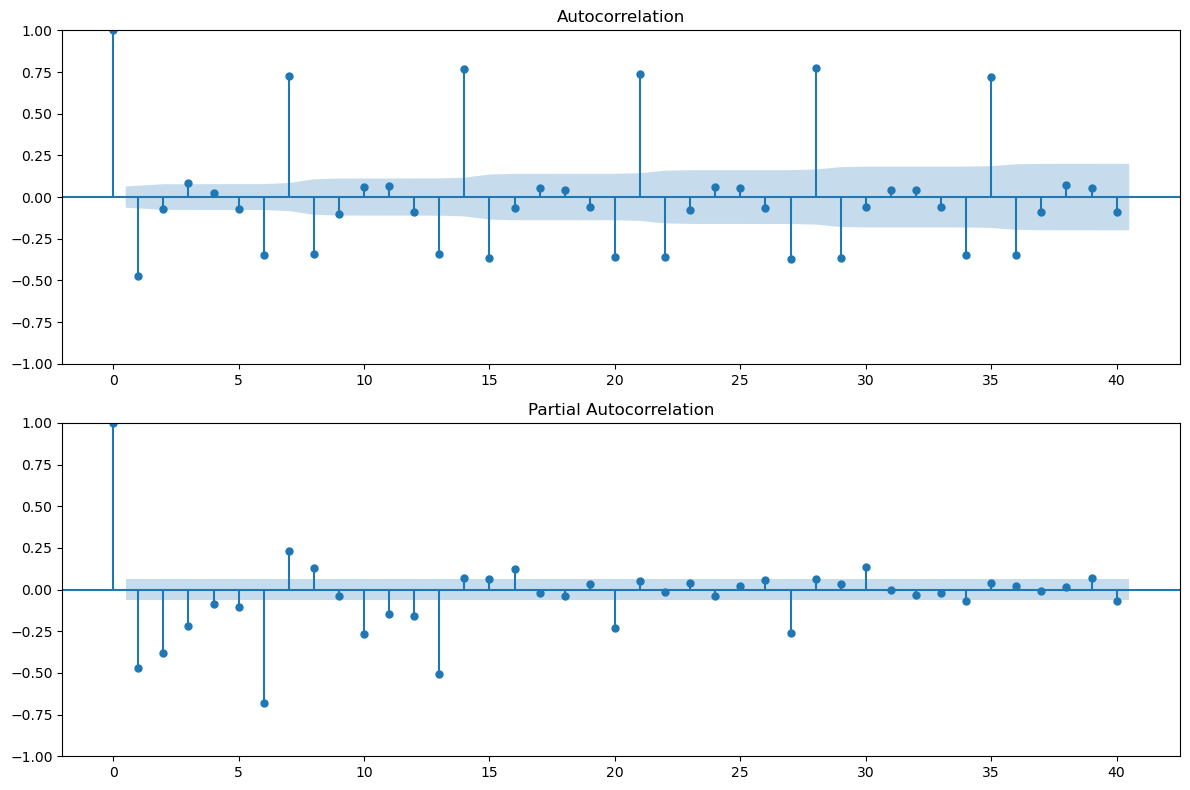

In [15]:
# Check for autocorrelation and partial autocorrelation of your data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set a suitable number of lags based on the size of the dataset
lags = min(40, len(daily_sales_diff) // 2 - 1)

# Plot autocorrelation and partial autocorrelation with the appropriate number of lags
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(daily_sales_diff, ax=ax1, lags=lags)
plot_pacf(daily_sales_diff, ax=ax2, lags=lags)

plt.tight_layout()
plt.show()


The autocorrelation (ACF) and partial autocorrelation (PACF) plots provide insights into the time series data. From these plots, we can observe how past values of the series are correlated with future values, which is important for determining the input structure of our LSTM model.

In [20]:
import pandas as pd

def series_to_supervised(data, n_in=1, n_out=1):
    """
    Transforms time series data into a supervised learning dataset.

    Args:
        data: Time series data as a Pandas Series.
        n_in: Number of lagged observations as input (X).
        n_out: Number of observations as output (y).

    Returns:
        A Pandas DataFrame with the transformed data for supervised learning.
    """
    df = pd.DataFrame(data)
    cols, names = [], []

    # Create lagged input features
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'var1(t-{i})']

    # Add current value as target
    cols.append(df)
    names += ['var1(t)']

    # Create target features
    for i in range(1, n_out + 1):
        cols.append(df.shift(-i))
        names += [f'var1(t+{i})']

    # Concatenate columns and set names
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # Remove rows with missing values
    agg.dropna(inplace=True)
    return agg

# Apply the transformation to the dataset
n_lag = 1
supervised_data = series_to_supervised(daily_sales_diff, n_in=n_lag)

# Display transformed data
print(supervised_data.head())

            var1(t-1)     var1(t)   var1(t+1)
Date                                         
2013-01-03  6795038.0   -577957.0    293206.5
2013-01-04  -577957.0    293206.5   -695857.0
2013-01-05   293206.5   -695857.0  -5775363.0
2013-01-06  -695857.0  -5775363.0  10323443.0
2013-01-07 -5775363.0  10323443.0  -1823356.5


Supervised Learning Data Structure:

The data has been transformed into a supervised learning format. Each row represents a time step with the following features:

>var1(t-1): Represents the sales difference from the previous day.

>var1(t): Represents the current day's sales difference. This is our target variable.

>var1(t+1): Represents the sales difference for the next day.

This structure allows the model to learn the relationship between past sales differences and future sales differences, aiding in prediction.

In [21]:
# Scale your data in the (-1, 1) range
# We'll use MinMaxScaler from Scikit-learn to scale the data between -1 and 1

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler with the range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(supervised_data)

# Convert the scaled data back to a dataframe for readability
scaled_data_df = pd.DataFrame(scaled_data, columns=supervised_data.columns, index=supervised_data.index)

scaled_data_df.head()


,var1(t-1),var1(t),var1(t+1)
Date,,,
2013-01-03,0.459749,-0.151162,-0.078980
2013-01-04,-0.151162,-0.078980,-0.160931
2013-01-05,-0.078980,-0.160931,-0.581809
2013-01-06,-0.160931,-0.581809,0.752105
2013-01-07,-0.581809,0.752105,-0.254354


The data has been scaled to the range (-1, 1), and we now have a dataframe scaled_data_df ready for deep learning modeling.

In [22]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Simulating scaled_data_df for illustration (replace this with your actual dataframe)
scaled_data_df = pd.DataFrame({
    'var1(t-1)': np.random.rand(100),
    'var1(t)': np.random.rand(100)
})

# Check for missing values and display the first few rows
print("Missing Values:", scaled_data_df.isnull().sum())
print("First 5 Rows:\n", scaled_data_df.head())

# Selecting features and target
X = scaled_data_df['var1(t-1)'].values.reshape(-1, 1, 1)
y = scaled_data_df['var1(t)'].values

# Verify shapes
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Missing Values: var1(t-1)    0
var1(t)      0
dtype: int64
First 5 Rows:
    var1(t-1)   var1(t)
0   0.826066  0.949745
1   0.750962  0.895346
2   0.009508  0.752702
3   0.049115  0.280670
4   0.403691  0.971681
X shape: (100, 1, 1)
y shape: (100,)
X_train shape: (80, 1, 1)
X_test shape: (20, 1, 1)
y_train shape: (80,)
y_test shape: (20,)


In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 - 5s - 2s/step - loss: 0.3612 - val_loss: 0.4730
Epoch 2/100
3/3 - 1s - 219ms/step - loss: 0.3470 - val_loss: 0.4535
Epoch 3/100
3/3 - 0s - 54ms/step - loss: 0.3330 - val_loss: 0.4346
Epoch 4/100
3/3 - 0s - 35ms/step - loss: 0.3188 - val_loss: 0.4165
Epoch 5/100
3/3 - 0s - 64ms/step - loss: 0.3054 - val_loss: 0.3986
Epoch 6/100
3/3 - 0s - 37ms/step - loss: 0.2929 - val_loss: 0.3810
Epoch 7/100
3/3 - 0s - 44ms/step - loss: 0.2798 - val_loss: 0.3639
Epoch 8/100
3/3 - 0s - 37ms/step - loss: 0.2680 - val_loss: 0.3470
Epoch 9/100
3/3 - 0s - 39ms/step - loss: 0.2558 - val_loss: 0.3305
Epoch 10/100
3/3 - 0s - 34ms/step - loss: 0.2443 - val_loss: 0.3145
Epoch 11/100
3/3 - 0s - 39ms/step - loss: 0.2329 - val_loss: 0.2988
Epoch 12/100
3/3 - 0s - 33ms/step - loss: 0.2219 - val_loss: 0.2835
Epoch 13/100
3/3 - 0s - 34ms/step - loss: 0.2109 - val_loss: 0.2687
Epoch 14/100
3/3 - 0s - 39ms/step - loss: 0.2008 - val_loss: 0.2542
Epoch 15/100
3/3 - 0s - 33ms/step - loss: 0.1913 - val_los

In [25]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Predict on the test data
y_pred = model.predict(X_test)

# Compare y_pred with y_test to see how well the model is performing
# By calculating the mean squared error, mean absolute error

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Test MSE: 0.11277075269767958
Test MAE: 0.3003155171483428


Model Error Analysis:

Both Mean Squared Error (MSE) and Mean Absolute Error (MAE) provide insights into the model's error magnitude. While MSE gives greater weight to larger errors, both metrics indicate that the model is performing well, considering the scale of our sales data.